In [3]:
from time import time
import numpy as np
import matplotlib.pyplot as plt
from matplotlib import offsetbox
from sklearn import (manifold, datasets, decomposition, discriminant_analysis, random_projection, neighbors)
import umap.umap_ as umap
from mpl_toolkits.mplot3d import Axes3D

In [2]:
#!pip install umap-learn

  Created wheel for umap-learn: filename=umap_learn-0.5.3-py3-none-any.whl size=82820 sha256=09e7aebc4d95d6117f18c032ecd517a0832c38230a5a9009aab69dae1aabec44
  Stored in directory: c:\users\mariana\appdata\local\pip\cache\wheels\a9\3a\67\06a8950e053725912e6a8c42c4a3a241410f6487b8402542ea
  Created wheel for pynndescent: filename=pynndescent-0.5.6-py3-none-any.whl size=53931 sha256=4d38d9cf9a2418dc3ff8f82d61ca3d01c42ce9329560e2c1a902d60f0445133a
  Stored in directory: c:\users\mariana\appdata\local\pip\cache\wheels\1d\07\6e\9ae4e883392994fd1d7c61a0377f0177e3f8e2faff6c677341
Successfully built umap-learn pynndescent


In [4]:
digits = datasets.load_digits(n_class=6)
X = digits.data
y = digits.target 
n_samples, n_features = X.shape
n_neighbors = 30

Text(0.5, 1.0, 'A selection from the 64-dimensional digits dataset')

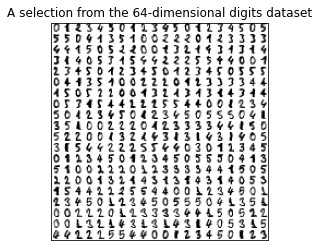

In [5]:
n_img_per_row = 20
img = np.zeros((10*n_img_per_row, 10*n_img_per_row))
for i in range(n_img_per_row):
    ix = 10 * i + 1
    for j in range(n_img_per_row):
        iy = 10 * j + 1
        img[ix:ix+8, iy:iy+8] = X[i*n_img_per_row+j].reshape((8,8))
plt.imshow(img, cmap=plt.cm.binary)
plt.xticks([])
plt.yticks([])
plt.title('A selection from the 64-dimensional digits dataset')

computing random projection


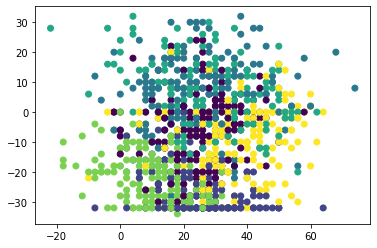

In [6]:
# random 2d projection using random binary matrix
print('computing random projection')
rp = random_projection.SparseRandomProjection(n_components=2, random_state=42)
X2 = rp.fit_transform(X)

colors = [int(i % 23) for i in y]
plt.scatter(X2[:,0], X2[:,1], c=colors)

computing PCA projection


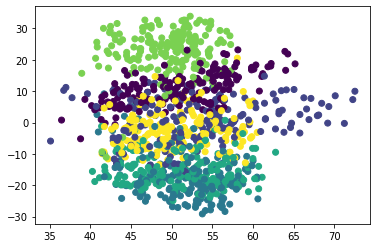

In [7]:
# projection on the 2 principal components
print('computing PCA projection')
t0 = time()
X2 = decomposition.TruncatedSVD(n_components=2).fit_transform(X)

colors = [int(i % 23) for i in y]
plt.scatter(X2[:,0], X2[:,1], c=colors)

computing Linear Discriminant Analysis Projection


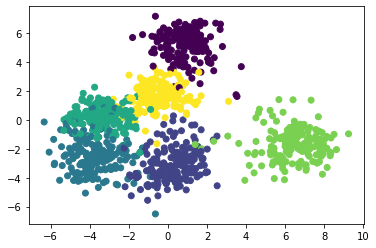

In [8]:
# projection on to the first 2 linear discriminant components
print('computing Linear Discriminant Analysis Projection')
X2 = X.copy()
X2.flat[::X.shape[1] + 1] += 0.01 # make x invertible
t0 = time()
X2 = discriminant_analysis.LinearDiscriminantAnalysis(n_components=2).fit_transform(X2, y)
colors = [int(i % 23) for i in y]
plt.scatter(X2[:,0], X2[:,1], c=colors)

computing isomap projection


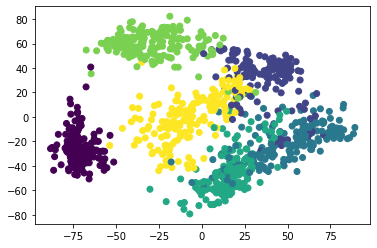

In [9]:
# isomap projection of the digits dataset
print('computing isomap projection')
t0 = time()
X2 = manifold.Isomap(n_neighbors=n_neighbors, n_components=2).fit_transform(X)
colors = [int(i % 23) for i in y]
plt.scatter(X2[:,0], X2[:,1], c=colors)

computing t-sne embedding


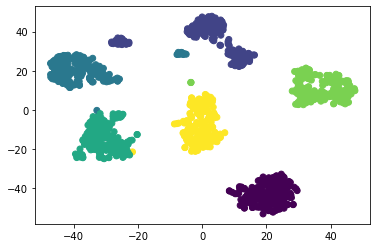

In [10]:
# t-sme embedding of the digits dataset
print('computing t-sne embedding')
tsne = manifold.TSNE(n_components=2, init='pca', random_state=0)
t0 = time()
X2 = tsne.fit_transform(X)
colors = [int(i % 23) for i in y]
plt.scatter(X2[:,0], X2[:,1], c=colors)

computing umap embedding


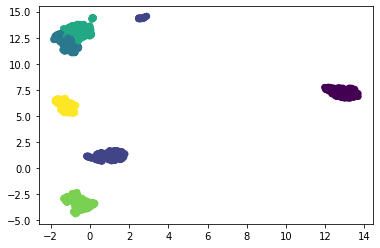

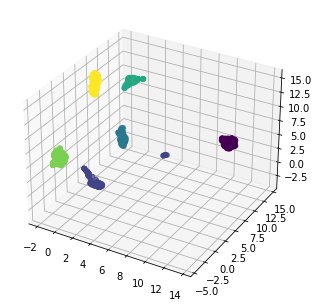

In [13]:
# umap embedding of the digits dataset
print('computing umap embedding')
reducer = umap.UMAP(n_neighbors=20, n_components=3, random_state=42, metric='minkowski')
t0 = time()
X2 = reducer.fit_transform(X)

colors = [int(i % 23) for i in y]
plt.scatter(X2[:,0], X2[:,1], c=colors)

fig = plt.figure()
ax = Axes3D(fig)
ax.scatter(X2[:,0], X2[:,1], X2[:,2], c=colors)
plt.show()

In [14]:
X

array([[ 0.,  0.,  5., ...,  0.,  0.,  0.],
       [ 0.,  0.,  0., ..., 10.,  0.,  0.],
       [ 0.,  0.,  0., ..., 16.,  9.,  0.],
       ...,
       [ 0.,  0.,  0., ...,  9.,  0.,  0.],
       [ 0.,  0.,  0., ...,  4.,  0.,  0.],
       [ 0.,  0.,  6., ...,  6.,  0.,  0.]])

In [15]:
len(X[0])

64

In [21]:
digits.keys()

dict_keys(['data', 'target', 'frame', 'feature_names', 'target_names', 'images', 'DESCR'])

In [22]:
y

array([0, 1, 2, ..., 4, 4, 0])